In [1]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\usepackage{newtxmath}'] 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt
from matplotlib import rc

from cycler import cycler


mpl.rcParams['ps.usedistiller'] = 'xpdf' 

plt.style.use('seaborn-notebook')
# sns.set_palette("Blues_r")

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

monochrome=(cycler('color', sns.color_palette("husl", 8))*2+(cycler('marker', ['v','<','^','>','o','s','p'])*7)[0:16])
plt.rc('axes', prop_cycle=monochrome)

pd.options.display.max_rows = 999

/var/folders/8v/5czrtjp134z_qn6j_jsmrnl80000gn/T/ipykernel_14125/1478693075.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\usepackage{newtxmath}']
/var/folders/8v/5czrtjp134z_qn6j_jsmrnl80000gn/T/ipykernel_14125/1478693075.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-notebook')


In [2]:
# Change if required
folder = "../experiments/2022-11-14-17-38_BanditNonStaticGradualGlobal_ADWIN_"
dataset = "GradualGlobal_ADWIN"

In [3]:
masterdata = pd.read_csv("%s/BanditNonStaticGradualGlobal_ADWIN.csv"%folder, sep=",")
narms = masterdata.iloc[0]['k']

In [4]:
sorted(masterdata.bandit.unique())

['CustomOracle',
 'MP-ADR-Elimination-UCB-ADWIN1; d=0.001',
 'MP-ADR-Elimination-UCB-ADWIN1; d=0.01',
 'MP-ADR-Elimination-UCB-ADWIN1; d=0.1',
 'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-12',
 'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-15',
 'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-4',
 'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-5',
 'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-6',
 'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-7',
 'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-8',
 'MP-ADS-KL-UCB-ADWIN1; d=0.001; r=false',
 'MP-ADS-KL-UCB-ADWIN1; d=0.001; r=true',
 'MP-ADS-KL-UCB-ADWIN1; d=0.01; r=false',
 'MP-ADS-KL-UCB-ADWIN1; d=0.01; r=true',
 'MP-ADS-KL-UCB-ADWIN1; d=0.1; r=false',
 'MP-ADS-KL-UCB-ADWIN1; d=0.1; r=true',
 'MP-ADS-KL-UCB-ADWIN1; d=1.0E-12; r=false',
 'MP-ADS-KL-UCB-ADWIN1; d=1.0E-12; r=true',
 'MP-ADS-KL-UCB-ADWIN1; d=1.0E-15; r=false',
 'MP-ADS-KL-UCB-ADWIN1; d=1.0E-15; r=true',
 'MP-ADS-KL-UCB-ADWIN1; d=1.0E-4; r=false',
 'MP-ADS-KL-UCB-ADWIN1; d=1.0E-4; r=true',
 'MP-ADS-KL-UCB-ADWIN1; d=1.0E-5;

In [5]:
sorted(masterdata.dataset.unique())

['GradualGlobalGenerator-100']

In [6]:
masterdata.columns

Index(['bandit', 'dataset', 'scalingstrategy', 'k', 'gain', 'cputime',
       'historylength', 'iteration'],
      dtype='object')

In [7]:
masterdata['reward/arm'] = masterdata['gain']/masterdata['k']

In [8]:
masterdata.shape

(540000, 9)

In [9]:
masterdata.groupby(["scalingstrategy", "bandit", "dataset"])[['gain', 'k', 'reward/arm', 'cputime']].mean()

gain  \
scalingstrategy bandit                                   dataset                                
No-1            CustomOracle                             GradualGlobalGenerator-100  0.747593   
                MP-ADR-Elimination-UCB-ADWIN1; d=0.001   GradualGlobalGenerator-100  0.567763   
                MP-ADR-Elimination-UCB-ADWIN1; d=0.01    GradualGlobalGenerator-100  0.568862   
                MP-ADR-Elimination-UCB-ADWIN1; d=0.1     GradualGlobalGenerator-100  0.545256   
                MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-12 GradualGlobalGenerator-100  0.603467   
                MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-15 GradualGlobalGenerator-100  0.602662   
                MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-4  GradualGlobalGenerator-100  0.564270   
                MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-5  GradualGlobalGenerator-100  0.573530   
                MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-6  GradualGlobalGenerator-100  0.585850   
                MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-7  GradualGlobalGenerator-100  0.595490   
                MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-8  GradualGlobalGenerator-100  0.600165   
                MP-ADS-KL-UCB-ADWIN1; d=0.001; r=false   GradualGlobalGenerator-100  0.691054   
                MP-ADS-KL-UCB-ADWIN1; d=0.001; r=true    GradualGlobalGenerator-100  0.691332   
                MP-ADS-KL-UCB-ADWIN1; d=0.01; r=false    GradualGlobalGenerator-100  0.690671   
                MP-ADS-KL-UCB-ADWIN1; d=0.01; r=true     GradualGlobalGenerator-100  0.690132   
                MP-ADS-KL-UCB-ADWIN1; d=0.1; r=false     GradualGlobalGenerator-100  0.689683   
                MP-ADS-KL-UCB-ADWIN1; d=0.1; r=true      GradualGlobalGenerator-100  0.650415   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-12; r=false GradualGlobalGenerator-100  0.693014   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-12; r=true  GradualGlobalGenerator-100  0.685136   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-15; r=false GradualGlobalGenerator-100  0.698332   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-15; r=true  GradualGlobalGenerator-100  0.697165   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-4; r=false  GradualGlobalGenerator-100  0.687697   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-4; r=true   GradualGlobalGenerator-100  0.686526   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-5; r=false  GradualGlobalGenerator-100  0.689975   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-5; r=true   GradualGlobalGenerator-100  0.679925   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-6; r=false  GradualGlobalGenerator-100  0.686258   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-6; r=true   GradualGlobalGenerator-100  0.673617   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-7; r=false  GradualGlobalGenerator-100  0.690724   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-7; r=true   GradualGlobalGenerator-100  0.673528   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-8; r=false  GradualGlobalGenerator-100  0.688751   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-8; r=true   GradualGlobalGenerator-100  0.680838   
                MP-ADS-TS-ADWIN1; d=0.001; r=false       GradualGlobalGenerator-100  0.665357   
                MP-ADS-TS-ADWIN1; d=0.001; r=true        GradualGlobalGenerator-100  0.664601   
                MP-ADS-TS-ADWIN1; d=0.01; r=false        GradualGlobalGenerator-100  0.663640   
                MP-ADS-TS-ADWIN1; d=0.01; r=true         GradualGlobalGenerator-100  0.650604   
                MP-ADS-TS-ADWIN1; d=0.1; r=false         GradualGlobalGenerator-100  0.659127   
                MP-ADS-TS-ADWIN1; d=0.1; r=true          GradualGlobalGenerator-100  0.609918   
                MP-ADS-TS-ADWIN1; d=1.0E-12; r=false     GradualGlobalGenerator-100  0.667336   
                MP-ADS-TS-ADWIN1; d=1.0E-12; r=true      GradualGlobalGenerator-100  0.660675   
                MP-ADS-TS-ADWIN1; d=1.0E-15; r=false     GradualGlobalGenerator-100  0.663954   
               

In [10]:
from matplotlib.markers import TICKLEFT, TICKRIGHT, TICKUP, TICKDOWN, CARETLEFT, CARETRIGHT, CARETUP, CARETDOWN
markers = [
#    '.',
#    ',',
    'v',
    '<',
    '^',
    '>',
    'o',
#    '1',
#    '2',
#    '3',
#    '4',
#    '8',
    's',
    'p',
    '*',
#    'h',
    'H',
    '+',
    'x',
    'D',
#    'd',
    '|',
    '_',
    TICKLEFT,
    TICKRIGHT,
    TICKUP,
    TICKDOWN,
    CARETLEFT,
    CARETRIGHT,
    CARETUP,
    CARETDOWN,
]
 

In [16]:
from matplotlib import cm
colors = [cm.Reds((i+2)/8.0) for i in range(8)] + [cm.Greens((i+2)/8.0) for i in range(8)]

In [17]:
algs = [    
    # ours 
#     'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-5',
#     'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-4',
#     'MP-ADR-Elimination-UCB-ADWIN1; d=0.001',
#     'MP-ADR-Elimination-UCB-ADWIN1; d=0.01',
#     'MP-ADR-Elimination-UCB-ADWIN1; d=0.1',
    
     'MP-ADS-TS-ADWIN1; d=0.1; r=false',
     'MP-ADS-TS-ADWIN1; d=0.01; r=false',
     'MP-ADS-TS-ADWIN1; d=0.001; r=false',
     'MP-ADS-TS-ADWIN1; d=1.0E-4; r=false',
     'MP-ADS-TS-ADWIN1; d=1.0E-6; r=false',
     'MP-ADS-TS-ADWIN1; d=1.0E-8; r=false',
     'MP-ADS-TS-ADWIN1; d=1.0E-12; r=false',
     'MP-ADS-TS-ADWIN1; d=1.0E-15; r=false',
#     'MP-ADS-TS-ADWIN1; d=1.0E-5; r=false',
    
     'MP-ADS-TS-ADWIN1; d=0.1; r=true',
     'MP-ADS-TS-ADWIN1; d=0.01; r=true',
     'MP-ADS-TS-ADWIN1; d=0.001; r=true',
     'MP-ADS-TS-ADWIN1; d=1.0E-4; r=true',
     'MP-ADS-TS-ADWIN1; d=1.0E-6; r=true',
     'MP-ADS-TS-ADWIN1; d=1.0E-8; r=true',
     'MP-ADS-TS-ADWIN1; d=1.0E-12; r=true',
     'MP-ADS-TS-ADWIN1; d=1.0E-15; r=true',
#    'MP-ADS-TS-ADWIN1; d=1.0E-5; r=true',
    
#     'MP-ADS-KL-UCB-ADWIN1; d=0.1; r=true',
#     'MP-ADS-KL-UCB-ADWIN1; d=0.01; r=true',
#     'MP-ADS-KL-UCB-ADWIN1; d=0.001; r=true',
#     'MP-ADS-KL-UCB-ADWIN1; d=1.0E-4; r=true',
#     'MP-ADS-KL-UCB-ADWIN1; d=1.0E-6; r=true',
#     'MP-ADS-KL-UCB-ADWIN1; d=1.0E-8; r=true',
#     'MP-ADS-KL-UCB-ADWIN1; d=1.0E-12; r=true',
]

In [18]:
prettynames = {
#     'MP-ADR-Elimination-UCB-ADWIN1; d=0.1':'ADR-Elimination-UCB; d=0.1',
#     'MP-ADR-Elimination-UCB-ADWIN1; d=0.01':'ADR-Elimination-UCB; d=0.01',
#     'MP-ADR-Elimination-UCB-ADWIN1; d=0.001':'ADR-Elimination-UCB; d=0.001',
#     'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-4':'ADR-Elimination-UCB; d=1.0E-4',
#     'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-5':'ADR-Elimination-UCB; d=1.0E-5',
    
     'MP-ADS-TS-ADWIN1; d=0.1; r=false':'ADS-TS; $\delta$=0.1',
     'MP-ADS-TS-ADWIN1; d=0.01; r=false':'ADS-TS; $\delta$=0.01',
     'MP-ADS-TS-ADWIN1; d=0.001; r=false':'ADS-TS; $\delta$=0.001',
     'MP-ADS-TS-ADWIN1; d=1.0E-4; r=false':'ADS-TS; $\delta$=1.0E-4',
     'MP-ADS-TS-ADWIN1; d=1.0E-6; r=false':'ADS-TS; $\delta$=1.0E-6',
     'MP-ADS-TS-ADWIN1; d=1.0E-8; r=false':'ADS-TS; $\delta$=1.0E-8',
     'MP-ADS-TS-ADWIN1; d=1.0E-12; r=false':'ADS-TS; $\delta$=1.0E-12',
     'MP-ADS-TS-ADWIN1; d=1.0E-15; r=false':'ADS-TS; $\delta$=1.0E-15',
#     'MP-ADS-TS-ADWIN1; d=1.0E-5; r=false':'ADS-TS; d=1.0E-5',
    
     'MP-ADS-TS-ADWIN1; d=0.1; r=true':'ADR-TS; $\delta$=0.1',
     'MP-ADS-TS-ADWIN1; d=0.01; r=true':'ADR-TS; $\delta$=0.01',
     'MP-ADS-TS-ADWIN1; d=0.001; r=true':'ADR-TS; $\delta$=0.001',
     'MP-ADS-TS-ADWIN1; d=1.0E-4; r=true':'ADR-TS; $\delta$=1.0E-4',
     'MP-ADS-TS-ADWIN1; d=1.0E-6; r=true':'ADR-TS; $\delta$=1.0E-6',
     'MP-ADS-TS-ADWIN1; d=1.0E-8; r=true':'ADR-TS; $\delta$=1.0E-8',
     'MP-ADS-TS-ADWIN1; d=1.0E-12; r=true':'ADR-TS; $\delta$=1.0E-12',
     'MP-ADS-TS-ADWIN1; d=1.0E-15; r=true':'ADR-TS; $\delta$=1.0E-15',
    
     'MP-ADS-KL-UCB-ADWIN1; d=0.1; r=true':'ADR-KL-UCB; $\delta$=0.1',
     'MP-ADS-KL-UCB-ADWIN1; d=0.01; r=true':'ADR-KL-UCB; $\delta$=0.01',
     'MP-ADS-KL-UCB-ADWIN1; d=0.001; r=true':'ADR-KL-UCB; $\delta$=0.001',
     'MP-ADS-KL-UCB-ADWIN1; d=1.0E-4; r=true':'ADR-KL-UCB; $\delta$=1.0E-4',
     'MP-ADS-KL-UCB-ADWIN1; d=1.0E-6; r=true':'ADR-KL-UCB; $\delta$=1.0E-6',
     'MP-ADS-KL-UCB-ADWIN1; d=1.0E-8; r=true':'ADR-KL-UCB; $\delta$=1.0E-8',
     'MP-ADS-KL-UCB-ADWIN1; d=1.0E-12; r=true':'ADR-KL-UCB; $\delta$=1.0E-12',
     'MP-ADS-KL-UCB-ADWIN1; d=1.0E-15; r=true':'ADR-KL-UCB; $\delta$=1.0E-15',
    
     'MP-ADS-KL-UCB-ADWIN1; d=0.1; r=false':'ADS-KL-UCB; $\delta$=0.1',
     'MP-ADS-KL-UCB-ADWIN1; d=0.01; r=false':'ADS-KL-UCB; $\delta$=0.01',
     'MP-ADS-KL-UCB-ADWIN1; d=0.001; r=false':'ADS-KL-UCB; $\delta$=0.001',
     'MP-ADS-KL-UCB-ADWIN1; d=1.0E-4; r=false':'ADS-KL-UCB; $\delta$=1.0E-4',
     'MP-ADS-KL-UCB-ADWIN1; d=1.0E-6; r=false':'ADS-KL-UCB; $\delta$=1.0E-6',
     'MP-ADS-KL-UCB-ADWIN1; d=1.0E-8; r=false':'ADS-KL-UCB; $\delta$=1.0E-8',
     'MP-ADS-KL-UCB-ADWIN1; d=1.0E-12; r=false':'ADS-KL-UCB; $\delta$=1.0E-12',
     'MP-ADS-KL-UCB-ADWIN1; d=1.0E-15; r=false':'ADS-KL-UCB; $\delta$=1.0E-15',
    
    
    
#    'MP-ADS-TS-ADWIN1; d=1.0E-5; r=true':'ADR-TS; d=1.0E-5',
}

In [19]:
# compute regret against 'OD', or just the cumulative rewards

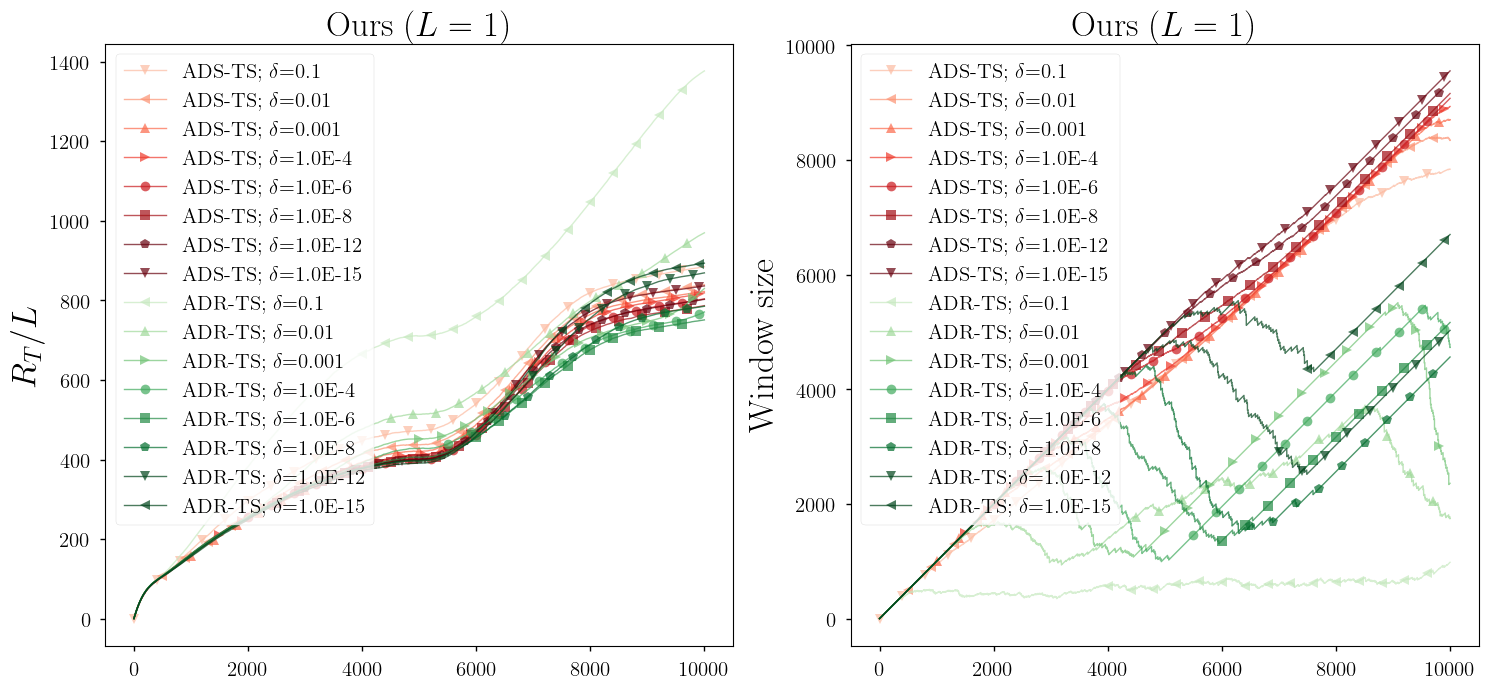

In [20]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))

L = 1

plt.sca(axes[0])

i = 0

subdata = masterdata[masterdata["scalingstrategy"] == "No-%s"%L]

for bandit in algs:
    toplot = subdata[subdata["bandit"] == bandit]
    cumsum = toplot.gain.cumsum().reset_index(drop=True)
    
subdata = masterdata[masterdata["scalingstrategy"] == "No-%s"%L]
oracle = subdata[subdata["bandit"] == "CustomOracle"].gain.cumsum().reset_index(drop=True)
for bandit in algs:
    toplot = subdata[subdata["bandit"] == bandit]
    cumsum = toplot.gain.cumsum().reset_index(drop=True)
    ((oracle-cumsum)/L).plot(label=prettynames[bandit],linewidth=1, alpha=0.7, markevery=(i*500,400), color=colors[i])
    i+=1

plt.legend(ncol=1)
plt.ylabel("$R_T / L$")
plt.title("Ours ($L = %s$)"%L)

plt.sca(axes[1])

i = 0
subdata = masterdata[masterdata["scalingstrategy"] == "No-%s"%L]
for bandit in algs:
    toplot = subdata[subdata["bandit"] == bandit]
    cumsum = toplot.historylength.reset_index(drop=True)/L
    cumsum.plot(label=prettynames[bandit],linewidth=1, alpha=0.7, markevery=(i*500,400), color=colors[i])
    i+=1
plt.legend(ncol=1)
plt.ylabel("Window size")
plt.title("Ours ($L = %s$)"%L)

plt.tight_layout()
plt.savefig("plots/ours_regret_gradual_full.pdf")

In [23]:
algs = [    
    # ours 
#     'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-5',
#     'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-4',
#     'MP-ADR-Elimination-UCB-ADWIN1; d=0.001',
#     'MP-ADR-Elimination-UCB-ADWIN1; d=0.01',
#     'MP-ADR-Elimination-UCB-ADWIN1; d=0.1',
    
    # 'MP-ADS-TS-ADWIN1; d=0.1; r=false',
    # 'MP-ADS-TS-ADWIN1; d=0.01; r=false',
    # 'MP-ADS-TS-ADWIN1; d=0.001; r=false',
    # 'MP-ADS-TS-ADWIN1; d=1.0E-4; r=false',
    # 'MP-ADS-TS-ADWIN1; d=1.0E-6; r=false',
    # 'MP-ADS-TS-ADWIN1; d=1.0E-8; r=false',
    # 'MP-ADS-TS-ADWIN1; d=1.0E-12; r=false',
    
    # 'MP-ADS-TS-ADWIN1; d=0.1; r=true',
    # 'MP-ADS-TS-ADWIN1; d=0.01; r=true',
    # 'MP-ADS-TS-ADWIN1; d=0.001; r=true',
    # 'MP-ADS-TS-ADWIN1; d=1.0E-4; r=true',
    # 'MP-ADS-TS-ADWIN1; d=1.0E-6; r=true',
    # 'MP-ADS-TS-ADWIN1; d=1.0E-8; r=true',
    # 'MP-ADS-TS-ADWIN1; d=1.0E-12; r=true',
    
     'MP-ADS-KL-UCB-ADWIN1; d=0.1; r=false',
     'MP-ADS-KL-UCB-ADWIN1; d=0.01; r=false',
     'MP-ADS-KL-UCB-ADWIN1; d=0.001; r=false',
     'MP-ADS-KL-UCB-ADWIN1; d=1.0E-4; r=false',
     'MP-ADS-KL-UCB-ADWIN1; d=1.0E-6; r=false',
     'MP-ADS-KL-UCB-ADWIN1; d=1.0E-8; r=false',
     'MP-ADS-KL-UCB-ADWIN1; d=1.0E-12; r=false',
     'MP-ADS-KL-UCB-ADWIN1; d=1.0E-15; r=false',
    
     'MP-ADS-KL-UCB-ADWIN1; d=0.1; r=true',
     'MP-ADS-KL-UCB-ADWIN1; d=0.01; r=true',
     'MP-ADS-KL-UCB-ADWIN1; d=0.001; r=true',
     'MP-ADS-KL-UCB-ADWIN1; d=1.0E-4; r=true',
     'MP-ADS-KL-UCB-ADWIN1; d=1.0E-6; r=true',
     'MP-ADS-KL-UCB-ADWIN1; d=1.0E-8; r=true',
     'MP-ADS-KL-UCB-ADWIN1; d=1.0E-12; r=true',
     'MP-ADS-KL-UCB-ADWIN1; d=1.0E-15; r=true',
]

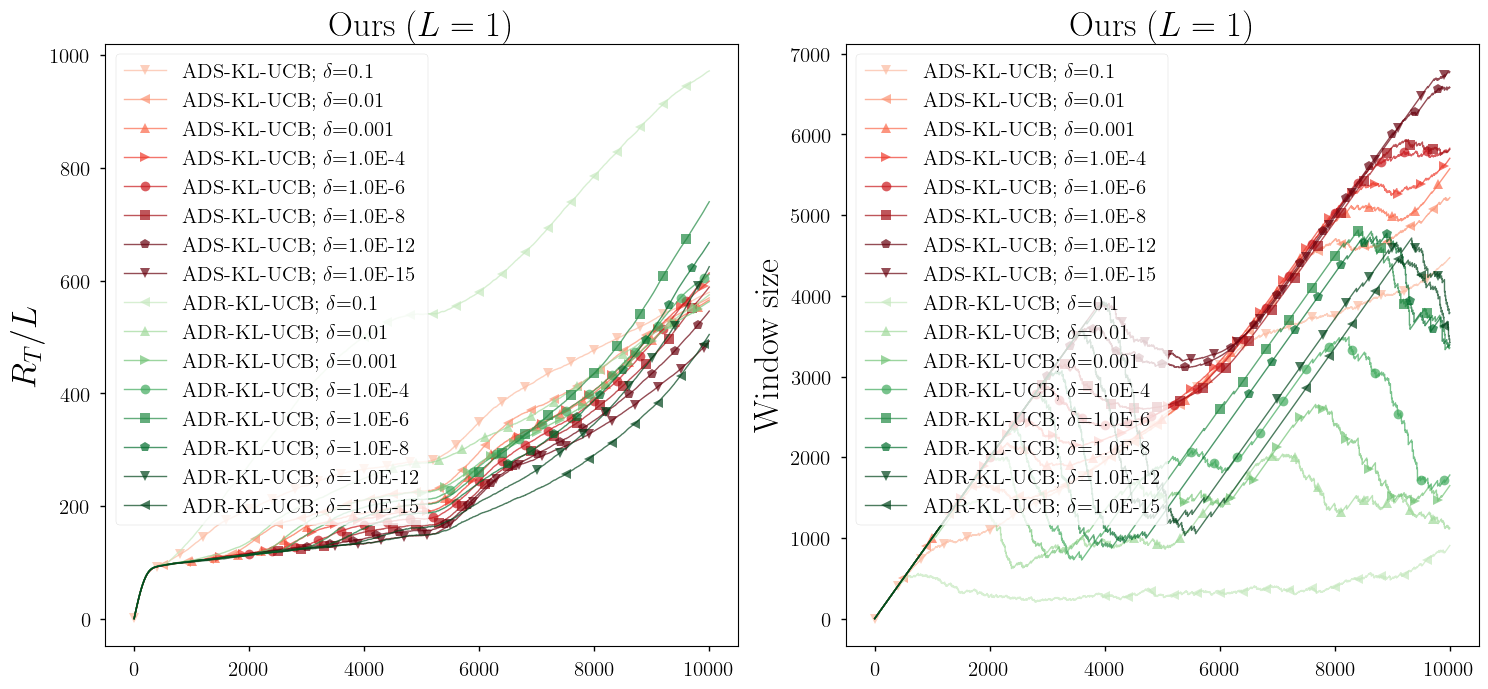

In [24]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))

L = 1

plt.sca(axes[0])

i = 0

subdata = masterdata[masterdata["scalingstrategy"] == "No-%s"%L]

for bandit in algs:
    toplot = subdata[subdata["bandit"] == bandit]
    cumsum = toplot.gain.cumsum().reset_index(drop=True)
    
subdata = masterdata[masterdata["scalingstrategy"] == "No-%s"%L]
oracle = subdata[subdata["bandit"] == "CustomOracle"].gain.cumsum().reset_index(drop=True)
for bandit in algs:
    toplot = subdata[subdata["bandit"] == bandit]
    cumsum = toplot.gain.cumsum().reset_index(drop=True)
    ((oracle-cumsum)/L).plot(label=prettynames[bandit],linewidth=1, alpha=0.7, markevery=(i*500,400), color=colors[i])
    i+=1

plt.legend(ncol=1)
plt.ylabel("$R_T / L$")
plt.title("Ours ($L = %s$)"%L)

plt.sca(axes[1])

i = 0
subdata = masterdata[masterdata["scalingstrategy"] == "No-%s"%L]
for bandit in algs:
    toplot = subdata[subdata["bandit"] == bandit]
    cumsum = toplot.historylength.reset_index(drop=True)/L
    cumsum.plot(label=prettynames[bandit],linewidth=1, alpha=0.7, markevery=(i*500,400), color=colors[i])
    i+=1
plt.legend(ncol=1)
plt.ylabel("Window size")
plt.title("Ours ($L = %s$)"%L)

plt.tight_layout()
plt.savefig("plots/ours_regret_abrupt_full_KL_UCB.pdf")